## Imports

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 


In [143]:
#Helper function for reading the .csv file 
def read_file():
    data = np.empty((50,14), dtype=object)
    numeric_data = np.zeros((50,9))
    cnt=-1
    with open(r'top50.csv', 'r') as f:
        reader = csv.reader(f, delimiter=',', escapechar='\\', quotechar='"')
        for line in reader:
            if cnt != -1:
                ID,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity = line
                data[cnt,:] = [ID,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity]
                numeric_data[cnt,:] = [Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness]
            cnt+=1
    return data, numeric_data

## Agglomerative Hierarchical Clustering

In [144]:
data, numeric_data = read_file()
print(numeric_data)

[[117.  55.  76.  -6.   8.  75. 191.   4.   3.]
 [105.  81.  79.  -4.   8.  61. 302.   8.   9.]
 [190.  80.  40.  -4.  16.  70. 186.  12.  46.]
 [ 93.  65.  64.  -8.   8.  55. 198.  12.  19.]
 [150.  65.  58.  -4.  11.  18. 175.  45.   7.]
 [102.  68.  80.  -5.   9.  84. 220.   9.   4.]
 [180.  64.  75.  -6.   7.  23. 131.   2.  29.]
 [111.  68.  48.  -5.   8.  35. 202.  15.   9.]
 [136.  62.  88.  -6.  11.  64. 157.   5.  10.]
 [135.  43.  70. -11.  10.  56. 194.  33.  38.]
 [176.  62.  61.  -5.  24.  24. 251.  60.  31.]
 [ 96.  71.  82.  -4.  15.  38. 185.  28.   7.]
 [110.  41.  50.  -6.  11.  45. 182.  75.   3.]
 [176.  79.  73.  -2.   6.  76. 288.   7.  20.]
 [101.  50.  83.  -4.  12.  10. 205.  10.   5.]
 [ 93.  45.  70.  -7.  16.  14. 261.  12.  15.]
 [176.  65.  75.  -6.  11.  43. 243.  15.  32.]
 [ 90.  48.  76.  -6.   7.  91. 158.  56.   5.]
 [130.  39.  84.  -8.  14.  50. 161.  18.   8.]
 [158.  62.  72.  -3.  12.  41. 173.  11.  11.]
 [124.  74.  68.  -7.   7.  63. 153.   4

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [80.0, 80.0, 120.0, 120.0],
  [27.5, 27.5, 100.0, 100.0]],
 'dcoord': [[0.0, 16.61324772583615, 16.61324772583615, 0.0],
  [0.0, 72.36942264059687, 72.36942264059687, 16.61324772583615],
  [0.0, 68.84039511798287, 68.84039511798287, 0.0],
  [0.0, 80.7031597894407, 80.7031597894407, 68.84039511798287],
  [72.36942264059687,
   175.41447515880236,
   175.41447515880236,
   80.7031597894407],
  [0.0, 66.43794096749235, 66.43794096749235, 0.0],
  [0.0, 120.83105088156296, 120.83105088156296, 0.0],
  [66.43794096749235,
   122.94226287164233,
   122.94226287164233,
   120.83105088156296],
  [0.0, 96.43261896267258, 96.43261896267258, 0.0],
  [0.0, 125.61955149247953,

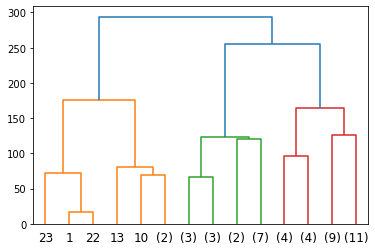

In [145]:
# clustering = AgglomerativeClustering(n_clusters = 2).fit(data)
# print(clustering.labels_)
clustering = linkage(numeric_data, method='ward')
dendrogram(clustering, truncate_mode='level', p=3)

In [146]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(numeric_data)
print(clustering.labels_)

[2 0 2 1 2 1 2 1 2 2 0 1 1 0 1 1 0 1 2 2 2 2 0 0 2 1 1 1 1 1 1 2 1 1 1 1 0
 2 2 1 1 1 1 1 1 1 2 1 1 1]


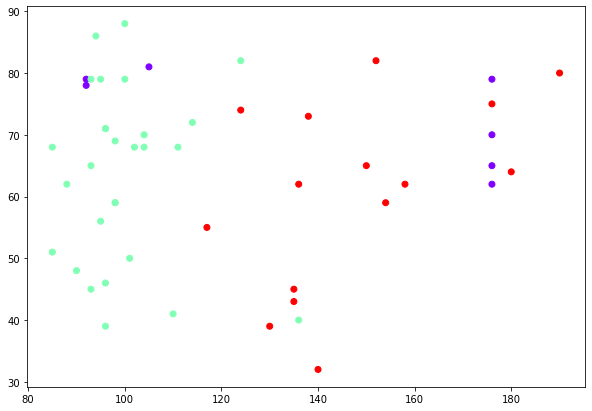

In [147]:
plt.figure(figsize=(10, 7))
plt.scatter(numeric_data[:,0], numeric_data[:,1], c=clustering.labels_, cmap='rainbow')